# Nueva visualización

- Óscar Alvarado

Se encontró un mejor conjunto de datos hecho apenas el 30 de abril. Éste lo puede encontrar en la página

https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Esto es para que al guardar las gráficas las guarde sin recortar nada, sin esto los ejes salen recortados
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
# Colores de la paleta que se usa en el cartel
paleta = {'rojo':'#FF0000', 'rojo2':'#CC0000', 'azul':'#3B4CCa', 'amarillo':'#FFDE00', 'dorado':'#B3A125'}
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [188]:
# Leemos los nuevos datos encontrados
df_completo = pd.read_csv('../datos/complete-pokemon-dataset-updated-300420/pokedex_(Update_05.20).csv')
# Quitamos las columnas que no nos interesan
df_completo.drop(['Unnamed: 0', 'german_name', 'japanese_name', 'egg_type_2', 'egg_type_number',
                  'egg_type_1', 'egg_cycles'], inplace = True, axis = 1)
# Renombramos las columnas a Español
df_completo.rename(columns = {'pokedex_number':'Número_pokedex','name':'Nombre', 'generation':'Generación', 
          'status':'Clasificación','species':'Especie','type_number':'Número_de_tipos','type_1':'Primer_tipo',
          'type_2':'Segundo_tipo','height_m':'Altura_m','weight_kg':'Peso_kg',
          'abilities_number':'#_de_habilidades','ability_1':'Habilidad_1','ability_2':'Habilidad_2',
          'ability_hidden':'Habilidad_oculta','total_points':'Puntos_totales','hp':'Vida','attack':'Ataque',
          'defense':'Defensa','sp_attack':'Ataque_especial','sp_defense':'Defensa_especial','speed':'Velocidad',
          'catch_rate':'Tasa_de_captura','base_friendship':'Amistad_base','base_experience':'Experiencia_base',
          'growth_rate':'Tasa_de_crecimiento','percentage_male':'Porcentaje_macho', 
          'against_normal':'Contra_normal','against_fire':'Contra_fuego','against_water':'Contra_agua',
          'against_electric':'Contra_eléctrico','against_grass':'Contra_planta','against_ice':'Contra_hielo',
          'against_fight':'Contra_luchador','against_poison':'Contra_posión','against_ground':'Contra_tierra',
          'against_flying':'Contra_volador','against_psychic':'Contra_psíquico','against_bug':'Contra_bicho',
          'against_rock':'Contra_roca','against_ghost':'Contra_fantasma','against_dragon':'Contra_dragón',
          'against_dark':'Contra_oscuridad','against_steel':'Contra_acero','against_fairy':'Contra_hada'}, 
            inplace = True)
# Remplazo de lo que se pueda cambiar de inglés a español, como los tipos y la clasificación.
tipos = dict(zip(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 
                  'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], 
        ['Planta', 'Fuego', 'Agua', 'Bicho', 'Normal', 'Oscuridad', 'Posión', 'Eléctrico', 'Tierra', 'Hielo', 
         'Hada', 'Acero', 'Luchador', 'Psíquico', 'Roca', 'Fantasma', 'Dragón', 'Volador']))
clasificación = dict(zip(['Sub Legendary', 'Legendary', 'Mythical'], 
                         ['Semi_Legendario', 'Legendario', 'Mítico']))
columnas = ['Primer_tipo', 'Segundo_tipo', 'Clasificación']
labels = [tipos, tipos, clasificación]
for idx, columna in enumerate(columnas):
    df_completo[columna].replace(to_replace = labels[idx], value = None, inplace = True)
df_completo.Nombre = df_completo.Nombre.map(lambda nombre: nombre.replace('.','').replace(' ',''))
# Mostramos los últimos 5 datos
df_completo.tail()

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
1023,888,ZacianHeroofManyBattles,8,Legendario,Warrior Pokémon,1,Hada,NaN,2.8,110.0,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,889,ZamazentaCrownedShield,8,Legendario,Warrior Pokémon,2,Luchador,Acero,2.9,785.0,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,889,ZamazentaHeroofManyBattles,8,Legendario,Warrior Pokémon,1,Luchador,NaN,2.9,210.0,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,890,Eternatus,8,Legendario,Gigantic Pokémon,2,Posión,Dragón,20.0,950.0,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
1027,890,EternatusEternamax,8,Legendario,Gigantic Pokémon,2,Posión,Dragón,100.0,NaN,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


## Datos faltantes

In [189]:
# Buscamos dónde hay nulos y obtenemos los resultados por columna
faltantes = df_completo.isna().sum()
# Obtenemos aquellas columnas en donde sí hay nulos
faltantes = faltantes[faltantes != 0]
# Agregamos una columa en cero al dataframe de pandas creado arriba
faltantes['Otros'] = 0
# Ordenamoms los datos para obtener una mejor gráfica de barras.
faltantes.sort_values(ascending = False, inplace = True)
# Mostramos los datos.
faltantes

Habilidad_2            515
Segundo_tipo           486
Porcentaje_macho       236
Habilidad_oculta       218
Experiencia_base       104
Amistad_base           104
Tasa_de_captura        104
Habilidad_1              3
Tasa_de_crecimiento      1
Peso_kg                  1
Otros                    0
dtype: int64

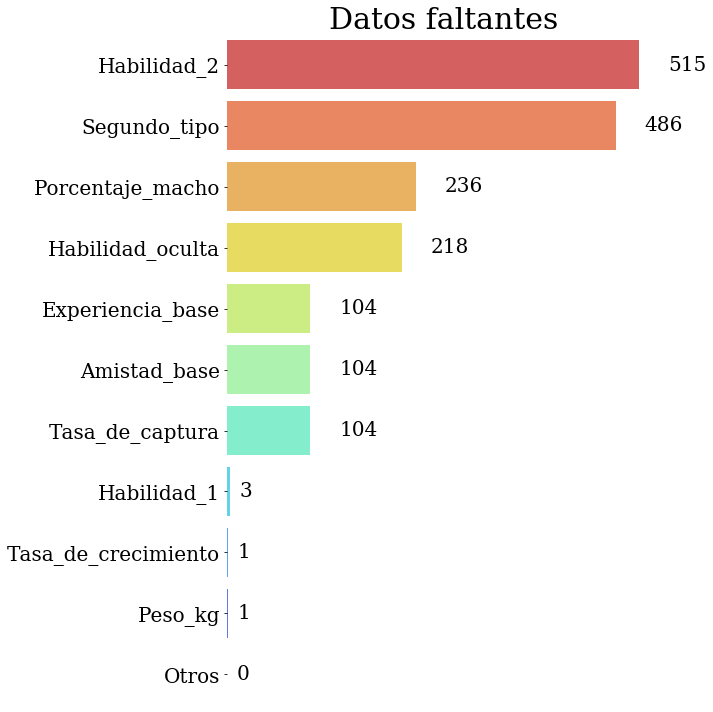

In [218]:
## Graficamos los datos obtenidos en la celda de arriba
# Escogimos esta paleta de colores por esto de las 'preattentive features'
colors1 = 'jet_r'
# Iniciamos la figura sobre la que graficaremos nuestra gráfica de barras
fig, ax = plt.subplots(figsize = (10, 10))
# Creamos la gráfica de barras y la colocamos sobre el eje creado.
graf = sns.barplot(ax = ax, y = list(faltantes.axes[0]), x = list(faltantes.values), alpha = 0.7, 
                   palette = colors1)
# Escribimos el valor al final de cada barra
for idx, valor in enumerate(faltantes.iteritems()):
    a = len(str(valor[1]))
    graf.text(valor[1] + 20*a, idx + 0.08, valor[1], color = 'k', ha = "center", fontsize = 20)
# Pinemos un título
ax.set_title(f'Datos faltantes', fontsize = 30, color = 'k')
# Quitamos los marcos de la gráfica (spines)
sns.despine(bottom = True, left = True)
# Quitamos la información del eje x
ax.set_xticks([])
# Poemos en el eje y los nombres de los valores graficados con el tamaño que deseamos
ax.set_yticklabels(list(faltantes.axes[0]), color = 'k', fontsize = 20)
# Guardamos la Figura
fig.savefig("../visualizacion/svg/faltantes_completo.svg", transparent = True)
plt.show()

En general tienen sentido ya que muchos faltantes son debido a que no es necesario que todos los pokemon tengan esta característica. Sin embargo en Experiencia base, amistad base y tasa de captura se tiene nulos a todos los de la útlima generació ya que son datos que aún no se han puesto en la página de donde fueron sacados los datos. Las tres características que sí son extrañas son la de habilidad 1, tasa de crecimiento y peso en kg pero estos problemas vienen porque los pokémon con estos nulos son pokémon especiales que en realidad no se usan como tal en los juegos. Se muestran a continuación la información de las columnas faltantes para saber qué tienen de especial los pokemon que no tienen estas características. 

- Experiencia base

In [199]:
df_completo[df_completo.Experiencia_base.isna()].head()

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
69,52,GalarianMeowth,1,Normal,Scratch Cat Pokémon,1,Acero,NaN,0.4,7.5,...,2.0,0.5,0.5,0.5,0.5,1.0,0.5,1.0,0.5,0.5
100,77,GalarianPonyta,1,Normal,Unique Horn Pokémon,1,Psíquico,NaN,0.8,24.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
102,78,GalarianRapidash,1,Normal,Unique Horn Pokémon,2,Psíquico,Hada,1.7,80.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
109,83,GalarianFarfetch'd,1,Normal,Wild Duck Pokémon,1,Luchador,NaN,0.8,42.0,...,1.0,2.0,2.0,0.5,0.5,1.0,1.0,0.5,1.0,2.0
142,110,GalarianWeezing,1,Normal,Poison Gas Pokémon,2,Posión,Hada,3.0,16.0,...,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5


- Habilidad 1

In [200]:
df_completo[df_completo.Habilidad_1.isna()]

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
33,25,PartnerPikachu,1,Normal,Mouse Pokémon,1,Eléctrico,NaN,0.4,6.0,...,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
170,133,PartnerEevee,1,Normal,Evolution Pokémon,1,Normal,NaN,0.3,6.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1027,890,EternatusEternamax,8,Legendario,Gigantic Pokémon,2,Posión,Dragón,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


- Tasa de crecimiento

In [201]:
df_completo[df_completo.Tasa_de_crecimiento.isna()]

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
652,555,DarmanitanGalarianZenMode,5,Normal,Zen Charm Pokémon,2,Hielo,Fuego,1.7,120.0,...,2.0,1.0,1.0,0.5,4.0,1.0,1.0,1.0,1.0,0.5


- Peso en kg

In [202]:
df_completo[df_completo.Peso_kg.isna()]

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
1027,890,EternatusEternamax,8,Legendario,Gigantic Pokémon,2,Posión,Dragón,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


## Duplicados

Es importante checar a los pokemon que tienen otras formas, por lo que habría que ver los repetidos en el número de pokedex. También se podría hacer el conteo de valores (que viene siendo algo así como los repetidos) en la variable de 'Clasificación' debido a que podemos ver la proporción de legendarios, míticos y pokémon normales que hay. 

- Distintas formas

En realidad todos estos pokémon tienen el mismo número de pokedex pero son formas alternas.

In [209]:
df_completo[df_completo.Número_pokedex.duplicated()]

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Agua,Roca,2.4,155.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
7,6,Mega Charizard X,1,Normal,Flame Pokémon,2,Normal,Hada,1.7,110.5,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,6,Mega Charizard Y,1,Normal,Flame Pokémon,2,Normal,Volador,1.7,100.5,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
12,9,Mega Blastoise,1,Normal,Shellfish Pokémon,1,Planta,NaN,1.6,101.1,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0
19,15,Mega Beedrill,1,Normal,Poison Bee Pokémon,2,Bicho,Roca,1.4,40.5,...,1.0,2.0,2.0,0.50,2.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,876,Indeedee Female,8,Normal,Emotion Pokémon,2,Fantasma,Fuego,0.9,28.0,...,1.0,1.0,0.5,2.00,1.0,0.0,1.0,2.0,1.0,1.0
1011,877,Morpeko Hangry Mode,8,Normal,Two-Sided Pokémon,2,Eléctrico,Psíquico,0.3,3.0,...,2.0,0.5,0.0,2.00,1.0,0.5,1.0,0.5,0.5,2.0
1023,888,Zacian Hero of Many Battles,8,Legendario,Warrior Pokémon,1,Posión,NaN,2.8,110.0,...,1.0,1.0,1.0,0.50,1.0,1.0,0.0,0.5,2.0,1.0
1025,889,Zamazenta Hero of Many Battles,8,Legendario,Warrior Pokémon,1,Dragón,NaN,2.9,210.0,...,1.0,2.0,2.0,0.50,0.5,1.0,1.0,0.5,1.0,2.0


Muestra aleatoria: Latios.

Utilizamos este pokémon para mostrar en el cartel como ejemplo.

In [201]:
df_completo[df_completo.Nombre.isin(['Latios'])].iloc[:,28:]

,Contra_agua,Contra_eléctrico,Contra_planta,Contra_hielo,Contra_luchador,Contra_posión,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
451,0.5,0.5,0.5,2.0,0.5,1.0,0.0,1.0,0.5,2.0,1.0,2.0,2.0,2.0,1.0,2.0


- Distintas clasificaciones

In [210]:
df_completo.Clasificación.value_counts()

Normal             915
Semi_Legendario     45
Legendario          39
Mítico              29
Name: Clasificación, dtype: int64

## Tipos

In [231]:
def donut_chart(tamaños, nombres, variable):
    """
    Función que crea unan gráfica de 'dona partida' que muestra las cuentas que hay del tipo 1 y del tipo 2 para los tipos 
    de pokemon existentes.
    
    Parámetros
    -----
    tamaños: lista de enteros
        Lista con los tamaños que se quieren poner en la gráfica de 'dona partida'.
    variable: cadena
        Cadena con la gráfica que se graficará.
    """
    # Iniciamos la figura y los ejes sobre los que pondremos nuestra gráfica.
    fig, ax = plt.subplots(figsize = (10,10), subplot_kw=dict(aspect="equal"))
    # La distancia que se aleja cada rebanada de la posición original
    explodes = [0.1 for _ in range(len(tamaños))]
    # Diccionario con las propiedades que queremos que tengam las rebanadas de la dona.
    dicwedge = {'alpha': 0.6}
    # Los colores oficiales del sitio de pokemon.com apra cada tipo
    colores = {'Agua': '#4592c4', 'Normal': '#a4acaf', 'Planta': '#9bcc50', 'Bicho': '#729f3f',
               'Fuego': '#fd7d24', 'Psíquico': '#f366b9', 'Roca': '#a38c21', 'Eléctrico': '#eed535', 
               'Tierra': '#d79877', 'Oscuridad': '#707070', 'Posión': '#b97fc9', 'Luchador': '#d56723', 
               'Dragón': '#a2535f', 'Fantasma': '#7b62a3', 'Acero': '#9eb7b8', 'Hielo': '#51c4e7', 
               'Hada': '#fdb9e9', 'Volador': '#8ca8d7'}
    # Obtenemos una lista con los colores del diccionario creado arriba
    list_colores = [colores[i] for i in nombres]
    # Dibujamos una gráfica de pastel con las observaciones mencionadas arriba (todavía no es una dona)
    wedges, text = ax.pie(tamaños, pctdistance = 0.85, explode = explodes, 
                        colors = list_colores, wedgeprops = dicwedge, radius = 0.9)


    # Le pondremos lo que quiere decir cada rebanada en unas cajas fuera de la dona
    # Propiedades de la caja
    bbox_props = dict(boxstyle = "square, pad = 0.3", fc = 'w', ec = 'k', lw = 1)
    # Propiedades de las líneas que conectan la dona con la caja
    kw = dict(arrowprops = dict(arrowstyle = "-"), bbox = bbox_props, zorder = 0, va = "center")
    # Definimos qué tan alejadas estarán las cajas del centro de la dona
    radio = [1.3, 1.45]

    # Para cada rebanada hacemos una caja
    for i, p in enumerate(wedges):
        # Le decimos su posición
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = 'center'
        # Estilo de la conexión entre las rebanadas y las cajas, utilizamos el diccionario creado arriba
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle, "color": 'k', 'linewidth':3})
        # Escribimos dentro de la caja
        ax.annotate(nombres[i]+': ' + str(tamaños[i]), xy = (x, y), xytext = ((radio[i%2])*x, (radio[i%2])*y),
                    horizontalalignment = horizontalalignment, color = 'k', 
                    fontsize = 15, **kw)

    # Dibujamos un círculo blanco en el centro de la gráfica de pastel para que parezca una dona
    centre_circle = plt.Circle((0, 0), 0.75, fc = 'w') # Creamos un círculo centrado en (0,0) y radio 0.7
    fig = plt.gcf() # Get the Current Figure
    fig.gca().add_artist(centre_circle) # Get the Current Axis y agrega el círculo.
    # Para guardar y poner el título correcto
    variable = variable.replace('_', ' ').lower()
    # Ponemos un título
    ax.set_title(f'Cuentas por tipo de la generación 8', fontsize = 30, color = 'k', y = 1.1)
    # Guardamos
    fig.savefig(f'../visualizacion/png/{variable}_2.png', transparent = False)
    plt.show()

- Tipo 1

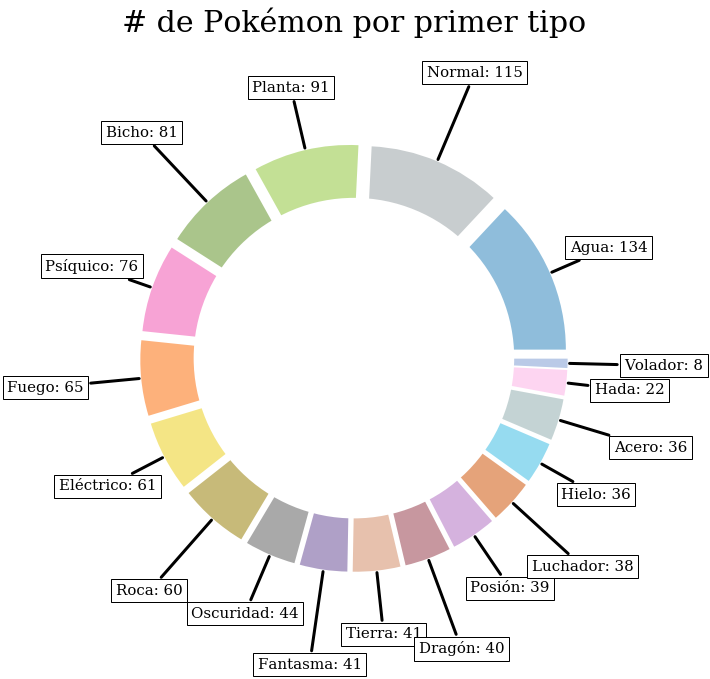

In [223]:
# Nos fijamos en el primer tipo
variable = 'Primer_tipo'
tipo1 = df_completo[variable]
donut_chart(tipo1.value_counts().values, tipo1.value_counts().index, variable)

- Tipo 2 

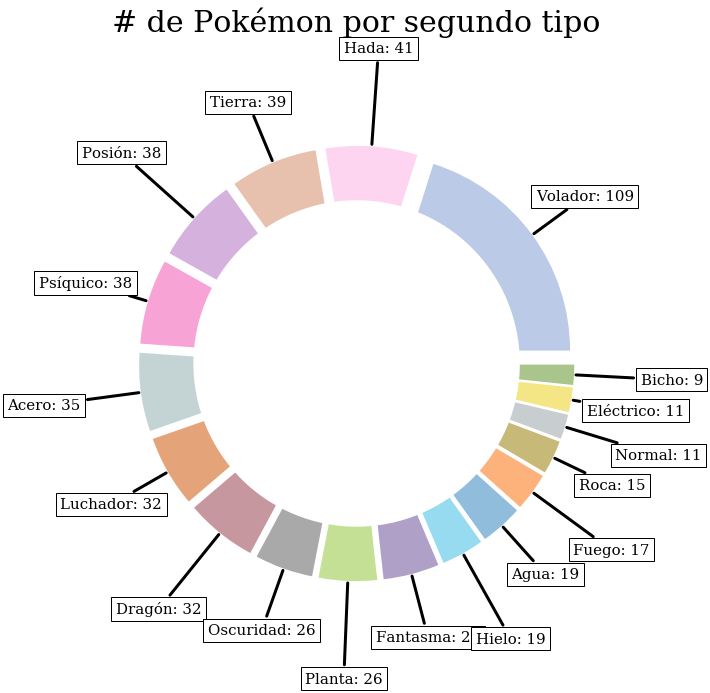

In [224]:
# Nos fijamos en el segundo tipo
variable = 'Segundo_tipo'
tipo2 = df_completo[variable]
donut_chart(tipo2.value_counts().values, tipo2.value_counts().index, variable)

In [215]:
# Clase implementada por mi compañero de clase David Guzmán, créditos a su trabajo en el desarrollo de la bilbioteca
# "ixlub" para análisis y visualización de datos. Se hicieron unas pequeñas modificaciones a la clase para los 
# propósitos de visualización del proyecto.
class RadarPlot():
    
    """   
    Parámetros
    ----------
    
    data: pandas.DataFrame
        DataFrame de pandas que contiene los datos a graficar, la primera columna
        debe contener el nombre de las subgráficas y el resto de las columnas deben
        ser valores numéricos. 
        
    nrows: int, opcional, default: 1
        Número de renglones que contendrá el arreglo de gráficas.
    
    ncols: int, opcional, default: 1
        Número de columnas que contendrá el arreglo de gráficas.
    
    title: str, opcional, default: ''
        Título principal de la figura.
    
    """
       
    def __init__(self, data, nrows = 1, ncols = 1, title = ''):
        self.data = data
        self.nrows = nrows
        self.ncols = ncols
        self.title = title
        
    def create_initial_figure(self, figsize = (10,5), pad = 2.0, LaTeX = True, title_size = 10):
        """
        
        Crea una figura con un arreglo de nrows x ncols gráficas vacías.
        
        Parámetros
        ----------
        
        figsize: (float, float), opcional, default: (10,5).
            Controla el tamaño de la figura.
            
        pad: float, opcional, defaul: 2.0
            Controla el espacio entre las subgráficas de la figura.
            
        LaTeX: bool, opcional, default: True
            Si es True genera las gráficas con un formato de LaTeX. 
            
        title_size: float, opcional, default: 10
            Controla el tamaño del título principal.
        
        """
        
        # Pr defecto le damos un formato en LaTeX a la gráfica para que se vea mejor.
        if LaTeX:
            plt.rc('text', usetex = True)
            plt.rc('font', family='serif')
        
        fig =  plt.figure(figsize = figsize)
        #fig.suptitle(self.title, fontsize = title_size)
                
        total = int(self.nrows*self.ncols)
        
        for i in range(total):
            # Posición de la gráfica en el arreglo de nrows x ncols
            pos = int(str(self.nrows) + str(self.ncols) + str(i+1))
            fig.add_subplot(pos, projection='polar')
            
        fig.tight_layout(pad = pad)
            
        return fig
    
               
    def create_plot(self, figsize = (10,5), pad = 2.0, LaTeX = True, title_size = 10, colores = ["r", "b"],
                    subtitles_size = 10, yticks = None, ticks_pad = 10, xticks_size = 8):
        """
        
        Crea una figura con un arreglo de nrows x ncols gráficas de tipo radar.
        
        Parámetros
        ----------
        
        figsize: (float, float), opcional, default: (10,5).
            Controla el tamaño de la figura.
            
        pad: float, opcional, defaul: 2.0
            Controla el espacio entre las subgráficas de la figura.
            
        LaTeX: bool, opcional, default: True
            Si es True genera las gráficas con un formato de LaTeX. 
            
        title_size: float, opcional, default: 10
            Controla el tamaño del título principal.
            
        subtitles_size: float, opcional, default: 10
            Controla el tamaño de los títulos de las subgráficas.
            
        yticks: array, opcional, default: None
            Array con las yticks que se desea mostrar en todas las subgráficas.
            
        ticks_pad: float, opcional, default: 10
            Controla el tamaño de la separación de las ticks de todas las subgráficas.
            
        xticks_size: float, opcional, default: 8
            Controla el tamaño de las xticks de todas las subgráficas.
        
        """
        
        fig = self.create_initial_figure(figsize = figsize, pad = pad, LaTeX = LaTeX, title_size = title_size)
              
        i = 0
               
        for ax in fig.axes:
            
            categories = list(self.data[1].index)[1:]
            N = len(categories)
            values = list(self.data[1].values)
            name = values[0]
            values = values[1:]
            # Agregamos el primer valor para cerrar el polígono
            values.append(values[0])
            
            angles = [2*np.pi*(n/float(N)) for n in range(N)]
            angles.append(angles[0])
            
            RGB = np.random.random(3)
            ax.plot(angles, values, linewidth = 4, color = colores[0])
            ax.fill(angles, values, alpha=1, color = colores[1])
            
            #ax.set_rlabel_position(0)
            ax.set_title(name, fontsize = subtitles_size)
            ax.tick_params(pad = ticks_pad)
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(categories, size = xticks_size)
            
            ax.set_yticks(values)
            if yticks != None:
                ax.set_yticks(yticks)
            
            i = i+1
        fig.savefig(f"../Visualizacion/{name}.png")
        plt.show()

### Mejores por estadística

Aquí nos fijamos en qué pokémon tiene las mejores estadísiticas de combate.

- Puntos totales

In [16]:
print(df_completo.Puntos_totales.max())
df_completo[df_completo.Puntos_totales.isin([df_completo.Puntos_totales.max()])]

1125.0


,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
1027,890,EternatusEternamax,8,Legendario,Gigantic Pokémon,2,Posión,Dragón,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


- Vida

In [184]:
print(df_completo.Vida.max())
df_completo[df_completo.Vida.isin([df_completo.Vida.max()])]

255.0


,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
288,242,Blissey,2,Normal,Happiness Pokémon,1,Normal,NaN,1.5,46.8,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1027,890,Eternatus Eternamax,8,Legendario,Gigantic Pokémon,2,Posión,Dragón,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


- Ataque

In [185]:
print(df_completo.Ataque.max())
df_completo[df_completo.Ataque.isin([df_completo.Ataque.max()])] 

190.0


,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
189,150,Mega Mewtwo X,1,Legendario,Genetic Pokémon,2,Psíquico,Luchador,2.3,127.0,...,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0


- Defensa

In [186]:
print(df_completo.Defensa.max())
df_completo[df_completo.Defensa.isin([df_completo.Defensa.max()])]

250.0


,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
1027,890,Eternatus Eternamax,8,Legendario,Gigantic Pokémon,2,Posión,Dragón,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


- Ataque especial

In [187]:
print(df_completo.Ataque_especial.max())
df_completo[df_completo.Ataque_especial.isin([df_completo.Ataque_especial.max()])] 

194.0


,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
190,150,Mega Mewtwo Y,1,Legendario,Genetic Pokémon,1,Psíquico,NaN,1.5,33.0,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0


- Defensa especial

In [188]:
print(df_completo.Defensa_especial.max())
df_completo[df_completo.Defensa_especial.isin([df_completo.Defensa_especial.max()])]

250.0


,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
1027,890,Eternatus Eternamax,8,Legendario,Gigantic Pokémon,2,Posión,Dragón,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


- Velocidad

In [189]:
print(df_completo.Velocidad.max())
df_completo[df_completo.Velocidad.isin([df_completo.Velocidad.max()])]

180.0


,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
463,386,Deoxys Speed Forme,3,Mítico,DNA Pokémon,1,Psíquico,NaN,1.7,60.8,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0


In [216]:
pokemon = ["EternatusEternamax", "Blissey", "MegaMewtwoX", "MegaMewtwoY", "DeoxysSpeedForme"]
caracteristicas = ['Vida', 'Ataque', 'Defensa', 'Ataque_especial', 'Defensa_especial', 'Velocidad']
data_pokemon = df_completo[df_completo.Nombre.isin(pokemon)].loc[:, ["Nombre"] + caracteristicas]
data_pokemon.columns = ["Nombre", "Vida", "Ataque", "Defensa", "At esp.", "Def esp.", "Velocidad"]
data_pokemon

,Nombre,Vida,Ataque,Defensa,At esp.,Def esp.,Velocidad
189,MegaMewtwoX,106.0,190.0,100.0,154.0,100.0,130.0
190,MegaMewtwoY,106.0,150.0,70.0,194.0,120.0,140.0
288,Blissey,255.0,10.0,10.0,75.0,135.0,55.0
463,DeoxysSpeedForme,50.0,95.0,90.0,95.0,90.0,180.0
1027,EternatusEternamax,255.0,115.0,250.0,125.0,250.0,130.0


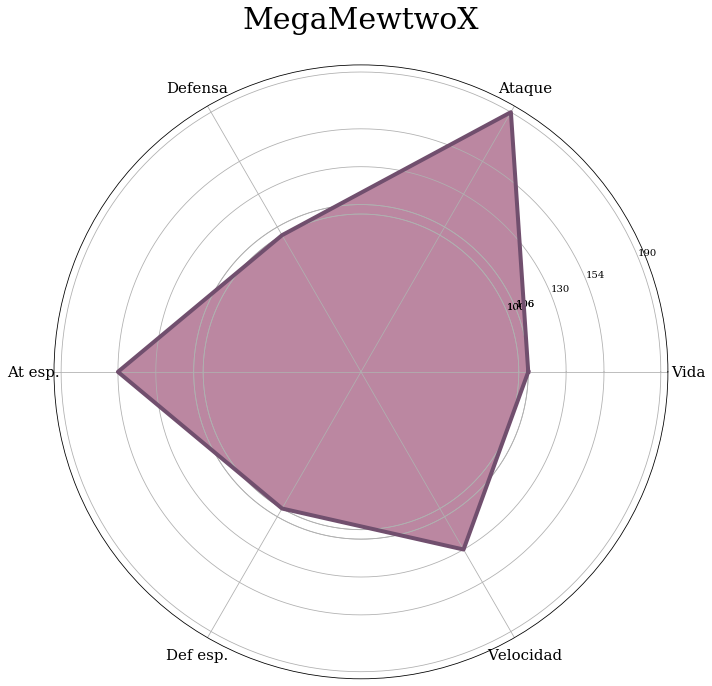

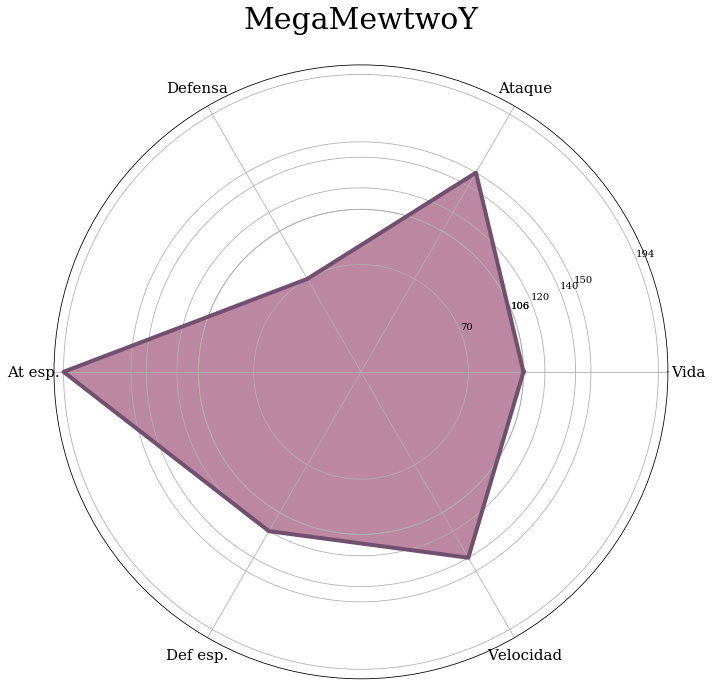

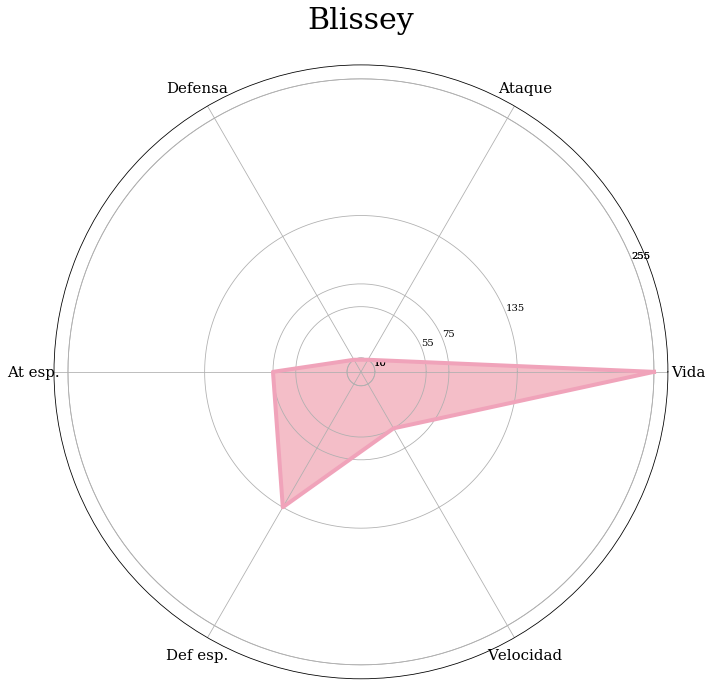

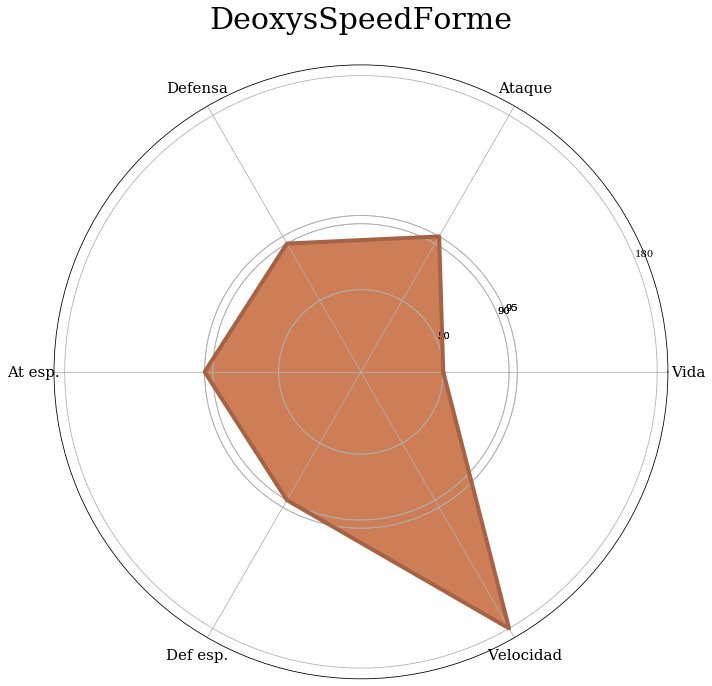

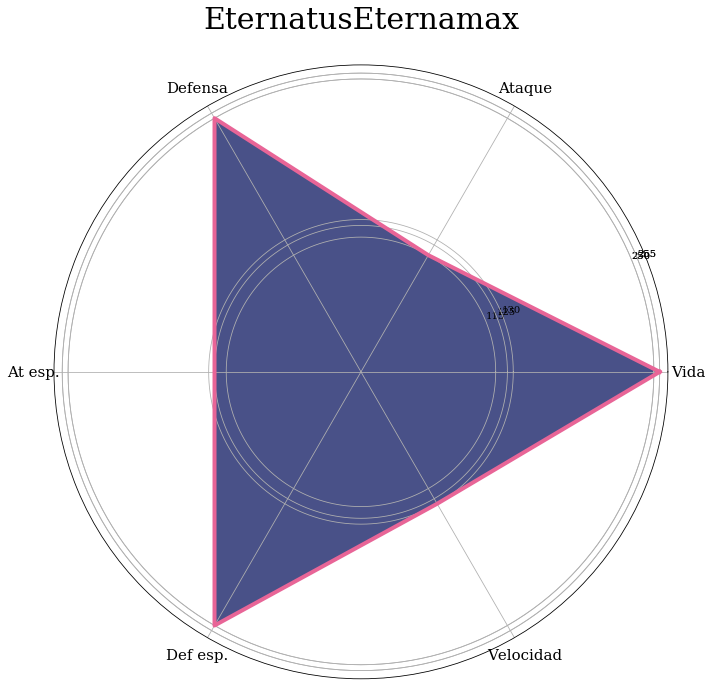

In [217]:
Blissey = ["#F0A3BA", "#F4BEC8"]
Mewtwo = ["#714F6E", "#BB87A1"]
Deoxys = ["#A66245", "#CE7E57"]
Eternatus = ["#E86597", "#495188"]
colores = [Mewtwo, Mewtwo, Blissey, Deoxys, Eternatus]
for idx, renglon in enumerate(data_pokemon.iterrows()):
    pokemones = RadarPlot(data = renglon, nrows = 1, ncols = 1, title='Estadísticas de algunos Pokémon')
    pokemones.create_plot(figsize = (10,10), pad = 8.0, LaTeX = False, title_size = 18, subtitles_size = 30, 
                          ticks_pad = 10, xticks_size = 15, colores = colores[idx])

----------------------------

## Generación 8

Aquí vemos los pokemon que son usables en la octava generación (no sólo se pueden usar los propios de la octava sino que también están disponibles de otras generaciones)

- Disponibles generación 8

Lista de los pokemon disponibles en la generación 8 pero que no son propiamente de dicha generación:

In [226]:
# Leemos los datos de los pokemon que son usabels en la octava generación
gen_8_disponibles = pd.read_csv('../datos/PokeDex8.csv')
nombres_todos_8 = gen_8_disponibles.Name.values # Los disponibles en octava generación
disp_8_completo = df_completo[df_completo.Nombre.isin(nombres_todos_8)]

In [227]:
disp_8_completo = pd.read_csv("../datos/Disp8_completo.csv")
disp_8_completo

,Evolución,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
0,P,4,Charmander,1,Normal,Lizard Pokémon,1,Fuego,NaN,0.6,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
1,I,5,Charmeleon,1,Normal,Flame Pokémon,1,Fuego,NaN,1.1,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
2,U,6,Charizard,1,Normal,Flame Pokémon,2,Fuego,Volador,1.7,...,0.0,1.0,1.0,0.25,4.00,1.0,1.0,1.0,0.5,0.5
3,P,10,Caterpie,1,Normal,Worm Pokémon,1,Bicho,NaN,0.3,...,0.5,2.0,1.0,1.00,2.00,1.0,1.0,1.0,1.0,1.0
4,I,11,Metapod,1,Normal,Cocoon Pokémon,1,Bicho,NaN,0.7,...,0.5,2.0,1.0,1.00,2.00,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,I,886,Drakloak,8,Normal,Caretaker Pokémon,2,Dragón,Fantasma,1.4,...,1.0,1.0,1.0,0.50,1.00,2.0,2.0,2.0,1.0,2.0
383,U,887,Dragapult,8,Normal,Stealth Pokémon,2,Dragón,Fantasma,3.0,...,1.0,1.0,1.0,0.50,1.00,2.0,2.0,2.0,1.0,2.0
384,U,888,Zacian,8,Legendario,Warrior Pokémon,2,Hada,Acero,2.8,...,2.0,0.5,0.5,0.25,0.50,1.0,0.0,0.5,1.0,0.5
385,U,889,Zamazenta,8,Legendario,Warrior Pokémon,2,Luchador,Acero,2.9,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0


In [228]:
tipos = disp_8_completo.loc[:, ["Primer_tipo", "Segundo_tipo", "Evolución", "Nombre", "Generación"]]
dic_cuentas = {}
for tipo in tipos.Primer_tipo.unique():
    tipo1 = tipos[tipos.Primer_tipo.isin([tipo])].values
    tipo2 = tipos[tipos.Segundo_tipo.isin([tipo])].values
    arreglo = np.vstack((tipo1, tipo2))
    dic_cuentas[tipo] = {'Tabla': arreglo, 'Cuenta': len(arreglo)}

In [229]:
cuentas_tipos = pd.Series([dic_cuentas[i]['Cuenta'] for i in dic_cuentas.keys()], list(dic_cuentas.keys()))
cuentas_8 = cuentas_tipos.sort_values(ascending = False)
cuentas_8

Agua         59
Psíquico     41
Planta       39
Tierra       38
Volador      36
Bicho        35
Fantasma     34
Oscuridad    32
Normal       32
Hada         31
Luchador     29
Posión       27
Hielo        27
Fuego        26
Roca         25
Dragón       25
Acero        25
Eléctrico    25
dtype: int64

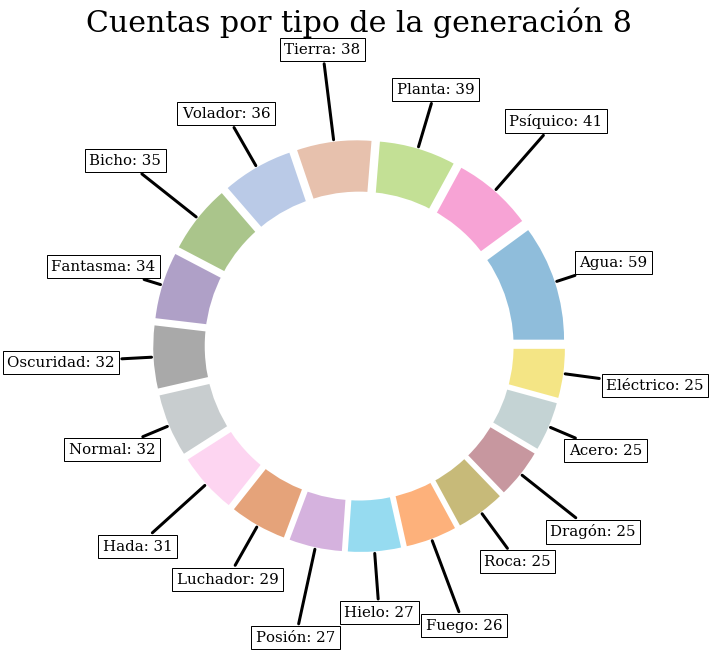

In [232]:
donut_chart(cuentas_8.values, list(cuentas_8.index), variable = 'gen_8')

In [234]:
para_pca = disp_8_completo.iloc[:,[0,2,9,10] + list(range(15, 25)) + list(range(26, 44))]
para_pca.dropna(axis = 0, inplace = True)
para_pca

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Evolución,Nombre,Altura_m,Peso_kg,Puntos_totales,Vida,Ataque,Defensa,Ataque_especial,Defensa_especial,...,Contra_posión,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero
0,P,Charmander,0.6,8.5,309.0,39.0,52.0,43.0,60.0,50.0,...,1.0,2.0,1.00,1.0,0.50,2.0,1.0,1.0,1.0,0.50
1,I,Charmeleon,1.1,19.0,405.0,58.0,64.0,58.0,80.0,65.0,...,1.0,2.0,1.00,1.0,0.50,2.0,1.0,1.0,1.0,0.50
2,U,Charizard,1.7,90.5,534.0,78.0,84.0,78.0,109.0,85.0,...,1.0,0.0,1.00,1.0,0.25,4.0,1.0,1.0,1.0,0.50
3,P,Caterpie,0.3,2.9,195.0,45.0,30.0,35.0,20.0,20.0,...,1.0,0.5,2.00,1.0,1.00,2.0,1.0,1.0,1.0,1.00
4,I,Metapod,0.7,9.9,205.0,50.0,20.0,55.0,25.0,25.0,...,1.0,0.5,2.00,1.0,1.00,2.0,1.0,1.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,U,Pyukumuku,0.3,1.2,410.0,55.0,60.0,130.0,30.0,130.0,...,1.0,1.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,0.50
302,U,Turtonator,2.0,212.0,485.0,60.0,78.0,135.0,91.0,85.0,...,1.0,2.0,1.00,1.0,0.50,2.0,1.0,2.0,1.0,0.50
303,U,Togedemaru,0.3,3.3,435.0,65.0,98.0,63.0,40.0,73.0,...,0.0,4.0,0.25,0.5,0.50,0.5,1.0,0.5,1.0,0.25
304,U,Mimikyu,0.2,0.7,476.0,55.0,90.0,80.0,50.0,105.0,...,1.0,1.0,1.00,1.0,0.25,1.0,2.0,0.0,1.0,2.00


In [237]:
pca = PCA(n_components = 4)
pca.fit(para_pca.iloc[:,2:])
print(pca.explained_variance_ratio_)

[0.6439245  0.19094825 0.05123515 0.03162327]


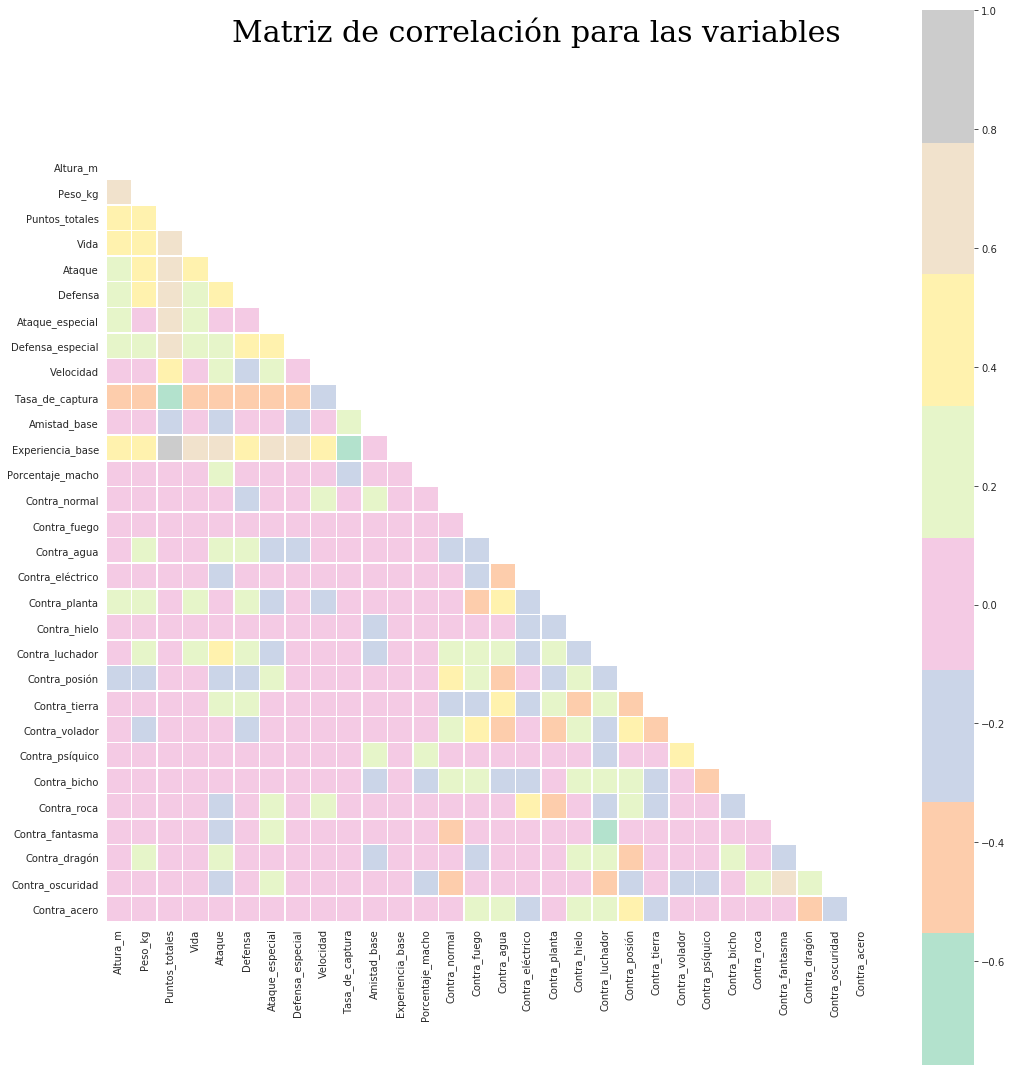

In [245]:
corr = np.corrcoef(para_pca.iloc[:,2:],rowvar=False)
corrMatrix = para_pca.iloc[:,2:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True, cmap="Pastel2", linewidths = 0.5)
plt.suptitle("Matriz de correlación para las variables", fontsize = 30)
f.savefig("../visualizacion/png/corr_matrix.png")

- K-means

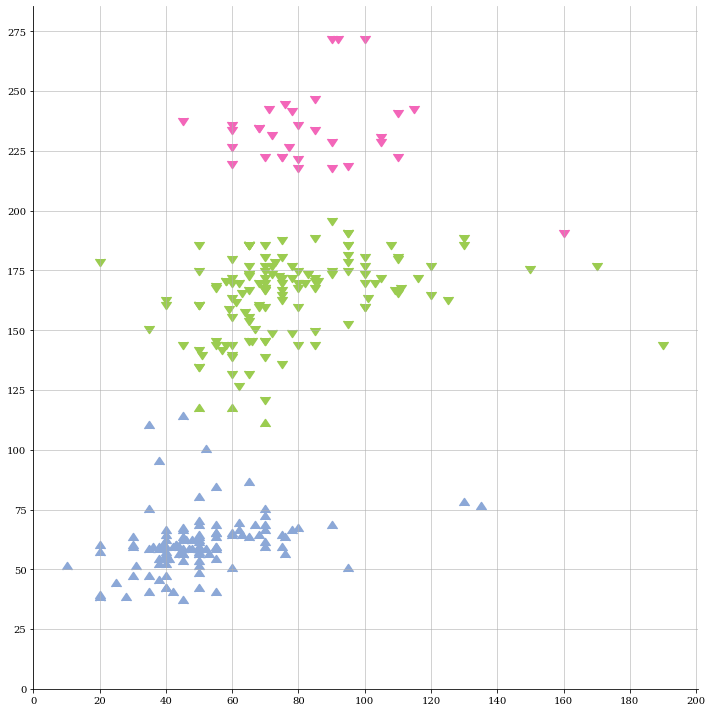

In [261]:
X = para_pca.loc[:, ['Vida', 'Experiencia_base']].values
kmeans = KMeans(n_clusters = 2, random_state=0).fit(X)
kl = kmeans.labels_
kmeans2 = KMeans(n_clusters = 3, random_state=0).fit(X)
kl2 = kmeans2.labels_

fig, ax = plt.subplots(figsize = (10, 10))
colores = ['#8ca8d7', '#9bcc50', '#f366b9']
marcas = [6, 7]
for idx, y in enumerate(para_pca.Experiencia_base.values):
    ax.scatter(x = para_pca.Vida.values[idx], y = y, color = colores[kl2[idx]], marker = marcas[kl[idx]],
              s = 100)
ax.set_yticks(np.linspace(0,275,12))
ax.set_xticks(np.linspace(0,200,11))
ax.grid(True, alpha = 0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_title("Agrupamiento por k-medias\n(k = 2 y k = 3)", fontsize = 30)
#ax.set_xlabel("Experiencia base", fontsize = 20)
#ax.set_ylabel("Puntos de vida", fontsize = 20)
fig.savefig("../visualizacion/svg/kmeans.svg", transparent = True)

In [523]:
ceros = np.argwhere(kl == 0)
ceros = ceros.reshape(1, len(ceros))[0]
unos = np.argwhere(kl == 1)
unos = unos.reshape(1, len(unos))[0]
dos = np.argwhere(kl == 2)
dos = dos.reshape(1, len(dos))[0]
para_pca.iloc[ceros, :]

,Evolución,Nombre,Altura_m,Peso_kg,Puntos_totales,Vida,Ataque,Defensa,Ataque_especial,Defensa_especial,...,Contra_posión,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero
27,U,Cloyster,1.5,132.5,525.0,50.0,95.0,180.0,85.0,45.0,...,1.00,1.0,1.00,1.0,1.0,2.0,1.0,1.0,1.0,1.00
39,I,Rhydon,1.9,120.0,485.0,105.0,130.0,120.0,45.0,45.0,...,0.25,2.0,0.50,1.0,1.0,0.5,1.0,1.0,1.0,2.00
42,I,MrMime,1.3,54.5,460.0,40.0,45.0,65.0,100.0,120.0,...,2.00,1.0,1.00,0.5,1.0,1.0,2.0,0.0,1.0,2.00
45,U,Lapras,2.5,220.0,535.0,130.0,85.0,80.0,85.0,95.0,...,1.00,1.0,1.00,1.0,1.0,2.0,1.0,1.0,1.0,1.00
53,U,Noctowl,1.6,40.8,452.0,100.0,50.0,50.0,86.0,96.0,...,1.00,0.0,1.00,1.0,0.5,2.0,0.0,1.0,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,U,Shiinotic,1.0,11.5,405.0,60.0,45.0,80.0,90.0,100.0,...,4.00,0.5,2.00,1.0,1.0,1.0,1.0,0.0,0.5,2.00
292,U,Bewear,2.1,135.0,500.0,120.0,125.0,80.0,55.0,60.0,...,1.00,1.0,2.00,2.0,0.5,0.5,0.0,1.0,0.5,1.00
296,U,Oranguru,1.5,76.0,490.0,90.0,60.0,80.0,90.0,110.0,...,1.00,1.0,1.00,0.5,2.0,1.0,0.0,1.0,2.0,1.00
303,U,Togedemaru,0.3,3.3,435.0,65.0,98.0,63.0,40.0,73.0,...,0.00,4.0,0.25,0.5,0.5,0.5,1.0,0.5,1.0,0.25


In [524]:
para_pca.iloc[unos, :]

,Evolución,Nombre,Altura_m,Peso_kg,Puntos_totales,Vida,Ataque,Defensa,Ataque_especial,Defensa_especial,...,Contra_posión,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero
31,P,Onix,8.8,210.0,385.0,35.0,45.0,160.0,30.0,45.0,...,0.25,2.0,0.5,1.0,1.00,0.5,1.0,1.0,1.00,2.00
38,P,Rhyhorn,1.0,115.0,345.0,80.0,85.0,95.0,30.0,30.0,...,0.25,2.0,0.5,1.0,1.00,0.5,1.0,1.0,1.00,2.00
52,P,Hoothoot,0.7,21.2,262.0,60.0,30.0,30.0,36.0,56.0,...,1.00,0.0,1.0,1.0,0.50,2.0,0.0,1.0,1.00,1.00
54,P,Chinchou,0.5,12.0,330.0,75.0,38.0,38.0,56.0,56.0,...,1.00,2.0,0.5,1.0,1.00,1.0,1.0,1.0,1.00,0.25
60,P,Natu,0.2,2.0,320.0,40.0,50.0,45.0,70.0,45.0,...,1.00,0.0,1.0,0.5,1.00,2.0,2.0,1.0,2.00,1.00
64,P,Wooper,0.4,8.5,210.0,55.0,45.0,45.0,25.0,25.0,...,0.50,1.0,1.0,1.0,1.00,0.5,1.0,1.0,1.00,0.50
70,U,Qwilfish,0.5,3.9,440.0,65.0,95.0,85.0,55.0,55.0,...,0.50,2.0,1.0,2.0,0.50,1.0,1.0,1.0,1.00,0.50
72,P,Sneasel,0.9,28.0,430.0,55.0,95.0,55.0,35.0,75.0,...,1.00,1.0,1.0,0.0,2.00,2.0,0.5,1.0,0.50,2.00
73,P,Swinub,0.4,6.5,250.0,50.0,50.0,40.0,30.0,30.0,...,0.50,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.00,2.00
78,U,Delibird,0.9,16.0,330.0,45.0,55.0,45.0,65.0,45.0,...,1.00,0.0,1.0,1.0,0.50,4.0,1.0,1.0,1.00,2.00


In [525]:
para_pca.iloc[dos, :]

,Evolución,Nombre,Altura_m,Peso_kg,Puntos_totales,Vida,Ataque,Defensa,Ataque_especial,Defensa_especial,...,Contra_posión,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero


Ideas: k-vecinos,

In [474]:
tipos_df = pd.read_csv("../datos/Type_chart.csv")
# Remplazo de lo que se pueda cambiar de inglés a español, como los tipos y la clasificación.
tipos = dict(zip(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 
                  'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], 
        ['Planta', 'Fuego', 'Agua', 'Bicho', 'Normal', 'Oscuridad', 'Posión', 'Eléctrico', 'Tierra', 'Hielo', 
         'Hada', 'Acero', 'Luchador', 'Psíquico', 'Roca', 'Fantasma', 'Dragón', 'Volador']))
tipos_df["type1"].replace(to_replace = tipos, value = None, inplace = True)
tipos_df["type2"].replace(to_replace = tipos, value = None, inplace = True)

tipos_df.set_index("type1 type2".split(), inplace = True)
tipos_df

Normal  Fire  Water  Electric  Grass  Ice  Fighting  \
type1     type2                                                          
Normal    NaN         1.0   1.0    1.0       1.0    1.0  1.0      2.00   
Fuego     NaN         1.0   0.5    2.0       1.0    0.5  0.5      1.00   
Agua      NaN         1.0   0.5    0.5       2.0    2.0  0.5      1.00   
Eléctrico NaN         1.0   1.0    1.0       0.5    1.0  1.0      1.00   
Planta    NaN         1.0   2.0    0.5       0.5    0.5  2.0      1.00   
...                   ...   ...    ...       ...    ...  ...       ...   
Oscuridad Dragón      1.0   0.5    0.5       0.5    0.5  2.0      2.00   
          Hada        1.0   1.0    1.0       1.0    1.0  1.0      1.00   
          Normal      1.0   1.0    1.0       1.0    1.0  1.0      4.00   
Hada      Volador     1.0   1.0    1.0       2.0    0.5  2.0      0.25   
          Acero       0.5   2.0    1.0       1.0    0.5  0.5      1.00   

                   Poison  Ground  Flying  Psychic   Bug  Rock  Ghost  Dragon  \
type1     type2                                                                 
Normal    NaN         1.0     1.0     1.0      1.0  1.00   1.0    0.0     1.0   
Fuego     NaN         1.0     2.0     1.0      1.0  0.50   2.0    1.0     1.0   
Agua      NaN         1.0     1.0     1.0      1.0  1.00   1.0    1.0     1.0   
Eléctrico NaN         1.0     2.0     0.5      1.0  1.00   1.0    1.0     1.0   
Planta    NaN         2.0     0.5     2.0      1.0  2.00   1.0    1.0     1.0   
...                   ...     ...     ...      ...   ...   ...    ...     ...   
Oscuridad Dragón      1.0     1.0     1.0      0.0  2.00   1.0    0.5     2.0   
          Hada        2.0     1.0     1.0      0.0  1.00   1.0    0.5     0.0   
          Normal      1.0     1.0     1.0      0.0  2.00   1.0    0.0     1.0   
Hada      Volador     2.0     0.0     1.0      1.0  0.25   2.0    1.0     0.0   
          Acero       0.0     2.0     0.5      0.5  0.25   0.5    0.5     0.0   

                   Dark  Steel  Fairy  
type1     type2                        
Normal    NaN      1.00    1.0    1.0  
Fuego     NaN      1.00    0.5    0.5  
Agua      NaN      1.00    0.5    1.0  
Eléctrico NaN      1.00    0.5    1.0  
Planta    NaN      1.00    1.0    1.0  
...                 ...    ...    ...  
Oscuridad Dragón   0.50    1.0    1.0  
          Hada     0.25    2.0    0.5  
          Normal   0.50    1.0    0.5  
Hada      Volador  0.50    2.0    1.0  
          Acero    0.25    1.0    NaN  

[165 rows x 18 columns]

In [475]:
# Pretendemos obtener un equipo de 6 pokémon que puedan vencer a la mayoría de los rivales
a_vencer = list(cuentas_8.index)
dic_rival = {}
for tipo in a_vencer:
    lista = []
    for idx1, idx2, e, n, g in dic_cuentas[tipo]['Tabla']:
        try:
            lista.append(tipos_df.loc[idx1, idx2, :].values[0])
        except:
            print(idx1, idx2)
    df = pd.DataFrame(np.array(lista), columns = list(tipos_df.columns))
    dic_rival[tipo] = [tipos[i] for i in list(df.sum().sort_values(ascending = False).index)][:2]

In [476]:
dic_rival

{'Agua': ['Planta', 'Eléctrico'],
 'Psíquico': ['Fantasma', 'Bicho'],
 'Planta': ['Fuego', 'Hielo'],
 'Tierra': ['Planta', 'Agua'],
 'Volador': ['Roca', 'Eléctrico'],
 'Bicho': ['Roca', 'Fuego'],
 'Fantasma': ['Fantasma', 'Hada'],
 'Oscuridad': ['Luchador', 'Bicho'],
 'Normal': ['Luchador', 'Hielo'],
 'Hada': ['Posión', 'Acero'],
 'Luchador': ['Volador', 'Psíquico'],
 'Posión': ['Tierra', 'Psíquico'],
 'Hielo': ['Fuego', 'Roca'],
 'Fuego': ['Roca', 'Tierra'],
 'Roca': ['Planta', 'Agua'],
 'Dragón': ['Hielo', 'Hada'],
 'Acero': ['Fuego', 'Tierra'],
 'Eléctrico': ['Tierra', 'Fuego']}

In [477]:
# Dado que hay repeticiones en la lista pasada podemos pensar en que un pokemon de un tipo abarca a varios 
# rivales, por lo que podemos pensar en buscar a tipos más lejanos. Pensemos en los siguientes tipos objetivo:
ideales = "Planta Fantasma Fuego Roca Luchador Posión".split() # Nuestros seis tipos principales.
# Notamos que sólo nos faltarían los tipos volador, tierra y hielo para poder tener ventaja sobre los demás, 
# por lo que podemos pensar en meter estos tipos como tipo secundario de nuestros pokemon

# Ahora buscamos las últimas evoluciones que tengan estos tipos; sabemos que ya habíamos armado los 
# dataframes en el diccionario "dic_cuentas" por lo que podemos sacar a nuestros candidatos de ahí, buscamos
# a los que tengan una U de "última" y evitaremos escoger los que tenga I o P de "Intermedia" y "Primera",
# respectivamente:
dic_cuentas['Planta']['Tabla'] # Rillaboom 'Planta', nan
dic_cuentas['Fantasma']['Tabla'] # Runerigus 'Tierra', 'Fantasma'
dic_cuentas['Fuego']['Tabla'] # Centiskorch 'Fuego', 'Roca'
dic_cuentas['Luchador']['Tabla'] # Falinks 'Luchador', nan
dic_cuentas['Posión']['Tabla'] # Toxtricity 'Eléctrico', 'Posión'
dic_cuentas['Volador']['Tabla'] # Cramorant 'Volador', 'Agua'

array([['Volador', 'Dragón', 'P', 'Noibat', 6],
       ['Volador', 'Dragón', 'U', 'Noivern', 6],
       ['Volador', nan, 'P', 'Rookidee', 8],
       ['Volador', nan, 'I', 'Corvisquire', 8],
       ['Volador', 'Acero', 'U', 'Corviknight', 8],
       ['Volador', 'Agua', 'U', 'Cramorant', 8],
       ['Fuego', 'Volador', 'U', 'Charizard', 1],
       ['Bicho', 'Volador', 'U', 'Butterfree', 1],
       ['Agua', 'Volador', 'U', 'Gyarados', 1],
       ['Normal', 'Volador', 'P', 'Hoothoot', 2],
       ['Normal', 'Volador', 'U', 'Noctowl', 2],
       ['Hada', 'Volador', 'I', 'Togetic', 2],
       ['Psíquico', 'Volador', 'P', 'Natu', 2],
       ['Psíquico', 'Volador', 'U', 'Xatu', 2],
       ['Hielo', 'Volador', 'U', 'Delibird', 2],
       ['Agua', 'Volador', 'U', 'Mantine', 2],
       ['Agua', 'Volador', 'P', 'Wingull', 3],
       ['Agua', 'Volador', 'U', 'Pelipper', 3],
       ['Bicho', 'Volador', 'U', 'Ninjask', 3],
       ['Bicho', 'Volador', 'P', 'Combee', 4],
       ['Bicho', 'Volador', 'U',